In [1]:
# Manipulação de arquivos
import os
import tarfile
from six.moves import urllib

# Análise Explorátoria de Dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Modelos de ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

### Buscando os dados
#### O método abaixo cria um diretorio chamado "dataset" e, dentro do repositório que foi apontando, busca os dados e faz o download na pasta

In [2]:
DOWLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

##### Após criar a função, basta chamar...

In [3]:
fetch_housing_data()

### Criando o DataSet
##### Esta função, simples, funciona para criar com o pandas o dataset usando o csv baixado

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.rename(columns={'housing_median_age':'idade_media_casa', 
                        'total_rooms': 'total_salas',
                        'total_bedrooms': 'total_quartos',
                        'population': 'populacao',
                        'households': 'familias',
                        'median_income': 'renda_media',
                        'median_house_value': 'valor_medio_casa',
                        'ocean_proximity': 'proximidade_oceano'}, inplace=True)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   idade_media_casa    20640 non-null  float64
 3   total_salas         20640 non-null  float64
 4   total_quartos       20433 non-null  float64
 5   populacao           20640 non-null  float64
 6   familias            20640 non-null  float64
 7   renda_media         20640 non-null  float64
 8   valor_medio_casa    20640 non-null  float64
 9   proximidade_oceano  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['proximidade_oceano'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: proximidade_oceano, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,idade_media_casa,total_salas,total_quartos,populacao,familias,renda_media,valor_medio_casa
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Quais dados estamos lidando...
#### Usando o histograma é uma forma de analisar os dados nos quais estamos lidando.

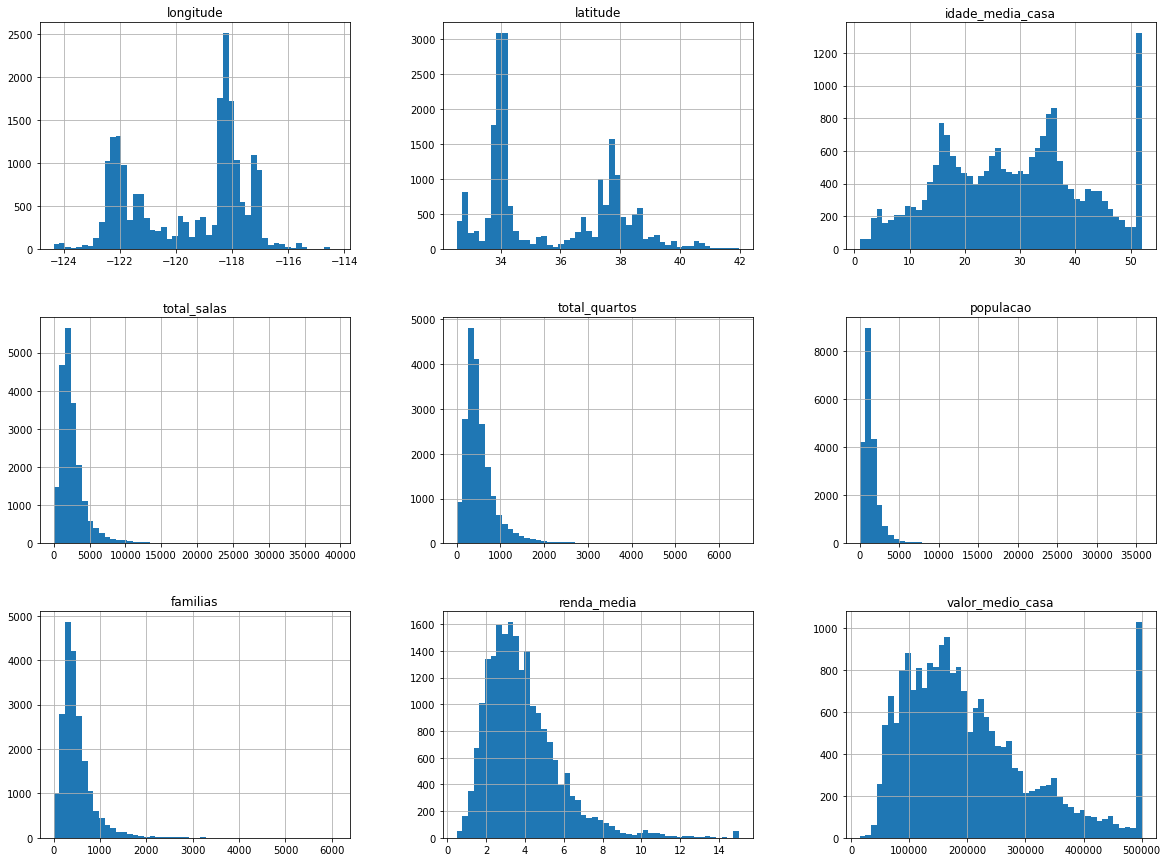

In [10]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### O código a seguir cria um atributo da categoria da renda dividindo a renda média por 1,5 (para limitar o número de categorias da renda) e arredondando com a utilização do ceil (para ter categorias discretas) e, em seguida, mesclando todas as categorias maiores que 5, na categoria 5

In [12]:
housing['renda_cat'] = np.ceil(housing['renda_media'] / 1.5)
housing['renda_cat'].where(housing['renda_cat'] < 5, 5.0, inplace=True)

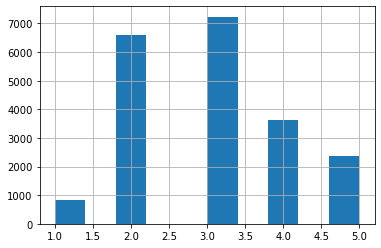

In [13]:
housing['renda_cat'].hist()
plt.show()

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing.renda_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['renda_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: renda_cat, dtype: float64

O conjunto de testes gerado com a utilização da amostragem estratificada tem proporções da categoria de renda quase idênticas às do conjunto completo de dados, enquanto o conjunto de testes gerado com amostragem puramente aleatória é bastante distorcido. Ou seja, a utilização de um teste estratificado representa mais o conjunto de dados original do que um teste aleatório.

Agora, você deve remover o atributo income_cat para que os dados voltem ao seu estado original...

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('renda_cat', axis=1, inplace=True)